In [2]:
from app.services.analysis_dict_manipulator import (
    extract_availible_summary_results_methods_one_result_set,
    extract_summary_result_types,
    update_one_seastate_sumamry_value, 
    _filter_dict_list, 
    update_seastate_summary_results,
    update_one_seastate_timeseriesid,
    extract_all_summary_results)
import pandas as pd
import glob, os
import postcentraltools.filereader4ss.FileReader4SS as fss
from concurrent.futures import ThreadPoolExecutor, as_completed
from app.services.database_service import database_service 
db_serv = database_service()
from azure.cosmos import CosmosClient
import requests
import pandas as pd
from tqdm.notebook import tqdm
import re
import numpy as np
fs_reader = fss.FileIOService4SSFile()
import datareservoirio as drio
from swim_4s.signal import angle_critical, heading_critical
import wellheadfatiguetools.scatter.ScatterDiagramTools as scattertools
import wellheadfatiguetools.histograms.histograms as hist_tools
drio_cl = drio.Client(drio.Authenticator(), cache_opt={"max_size": 100*1024,  "cache_root": r'D:\.cache'} )
import rainflow
hist_calc=hist_tools.histogram_calculator_python_rainflow(rainflow)
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("https://github.com/4Subsea/mplstyle-4ss/blob/main/4subsea_presentation.mplstyle?raw=True")


C:\ProjC\software-development\analysis-store\.venv\lib\site-packages\sensor_4s\fusion\numba_optimized.py:114: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(nopython=False)


# Document manipulation

In [3]:
doc = {'id': '683807f5-5823-49fe-95fb-f3a3a1cebdb4',
 'metadata': {'responsible_engineer': 'jonny loggon',
  'project_id': 1001,
  'well_name': 'wellewell',
  'well_location': {'longitude': 2.0, 'latitude': 5.0},
  'version': 'testversion',
  'analysis_type': 'string',
  'simulation_lenght': 1800.0,
  'water_depth': 150.0,
  'wave_direction': 55.0,
  'vessel_heading': 62.0,
  'current': 'None',
  'vessel_id': '61ecac4b-b2ba-48cc-8646-fabb1e9fd44b',
  'xt': True,
  'soil_profile': 'suppesoil1',
  'overpull': 490500.0,
  'drillpipe_tension': 738750.0},
 'general_results': {'m_eq_dominant_direction': 1000.0},
 'all_seastate_results': [{'meta': {'location': 'wh_datum',
    'result_type': 'bending moment local x',
    'unit': 'kNm'},
   'data': [{'hs': 0.5,
     'tp': 5.5,
     'result': {'summary_values': [{'method': 'std', 'value': 120.5}],
      'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa1'}},
    {'hs': 1.5,
     'tp': 5.5,
     'result': {'summary_values': [{'method': 'std', 'value': 134.5}],
      'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa2'}},
    {'hs': 0.5,
     'tp': 2.5,
     'result': {'summary_values': [{'method': 'std', 'value': 152.5}],
      'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa3'}}]},
  {'meta': {'location': 'wh_datum',
    'result_type': 'bending moment local y',
    'unit': 'kNm'},
   'data': [
       {'hs': 0.5,
        'tp': 5.5,
        'result': {'summary_values': [{'method': 'std', 'value': 20.5}],
        'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa4'}},
       {'hs': 0.5,
        'tp': 10.5,
        'result': {'summary_values': [{'method': 'std', 'value': 20.5}]}},
    {'hs': 1.5,
     'tp': 5.5,
     'result': {'summary_values': [{'method': 'std', 'value': 34.5}],
      'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa5'}},
    {'hs': 0.5,
     'tp': 2.5,
     'result': {'summary_values': [{'method': 'std', 'value': 52.5}],
      'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa6'}}]}],
 '_rid': 'EDQjAIEknl8BAAAAAAAAAA==',
 '_self': 'dbs/EDQjAA==/colls/EDQjAIEknl8=/docs/EDQjAIEknl8BAAAAAAAAAA==/',
 '_etag': '"0800f664-0000-3c00-0000-646dfe100000"',
 '_attachments': 'attachments/',
 '_ts': 1684930064}

In [4]:
doc = update_one_seastate_timeseriesid(doc, 0.5, 10.5, 'wh_datum', 'bending moment local y', "jonny_id_4")
doc

{'id': '683807f5-5823-49fe-95fb-f3a3a1cebdb4',
 'metadata': {'responsible_engineer': 'jonny loggon',
  'project_id': 1001,
  'well_name': 'wellewell',
  'well_location': {'longitude': 2.0, 'latitude': 5.0},
  'version': 'testversion',
  'analysis_type': 'string',
  'simulation_lenght': 1800.0,
  'water_depth': 150.0,
  'wave_direction': 55.0,
  'vessel_heading': 62.0,
  'current': 'None',
  'vessel_id': '61ecac4b-b2ba-48cc-8646-fabb1e9fd44b',
  'xt': True,
  'soil_profile': 'suppesoil1',
  'overpull': 490500.0,
  'drillpipe_tension': 738750.0},
 'general_results': {'m_eq_dominant_direction': 1000.0},
 'all_seastate_results': [{'meta': {'location': 'wh_datum',
    'result_type': 'bending moment local x',
    'unit': 'kNm'},
   'data': [{'hs': 0.5,
     'tp': 5.5,
     'result': {'summary_values': [{'method': 'std', 'value': 120.5}],
      'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa1'}},
    {'hs': 1.5,
     'tp': 5.5,
     'result': {'summary_values': [{'method': 'std', 'valu

In [5]:
doc = update_one_seastate_timeseriesid(doc, 0.5, 5.5, 'wh_datum', 'bending moment local y', "jonny_id_2")
doc

{'id': '683807f5-5823-49fe-95fb-f3a3a1cebdb4',
 'metadata': {'responsible_engineer': 'jonny loggon',
  'project_id': 1001,
  'well_name': 'wellewell',
  'well_location': {'longitude': 2.0, 'latitude': 5.0},
  'version': 'testversion',
  'analysis_type': 'string',
  'simulation_lenght': 1800.0,
  'water_depth': 150.0,
  'wave_direction': 55.0,
  'vessel_heading': 62.0,
  'current': 'None',
  'vessel_id': '61ecac4b-b2ba-48cc-8646-fabb1e9fd44b',
  'xt': True,
  'soil_profile': 'suppesoil1',
  'overpull': 490500.0,
  'drillpipe_tension': 738750.0},
 'general_results': {'m_eq_dominant_direction': 1000.0},
 'all_seastate_results': [{'meta': {'location': 'wh_datum',
    'result_type': 'bending moment local x',
    'unit': 'kNm'},
   'data': [{'hs': 0.5,
     'tp': 5.5,
     'result': {'summary_values': [{'method': 'std', 'value': 120.5}],
      'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa1'}},
    {'hs': 1.5,
     'tp': 5.5,
     'result': {'summary_values': [{'method': 'std', 'valu

In [6]:
doc = update_one_seastate_sumamry_value(doc, 0.5, 3.5, 'wh_datum', 'bending moment local y', 'min', 170.)
doc

{'id': '683807f5-5823-49fe-95fb-f3a3a1cebdb4',
 'metadata': {'responsible_engineer': 'jonny loggon',
  'project_id': 1001,
  'well_name': 'wellewell',
  'well_location': {'longitude': 2.0, 'latitude': 5.0},
  'version': 'testversion',
  'analysis_type': 'string',
  'simulation_lenght': 1800.0,
  'water_depth': 150.0,
  'wave_direction': 55.0,
  'vessel_heading': 62.0,
  'current': 'None',
  'vessel_id': '61ecac4b-b2ba-48cc-8646-fabb1e9fd44b',
  'xt': True,
  'soil_profile': 'suppesoil1',
  'overpull': 490500.0,
  'drillpipe_tension': 738750.0},
 'general_results': {'m_eq_dominant_direction': 1000.0},
 'all_seastate_results': [{'meta': {'location': 'wh_datum',
    'result_type': 'bending moment local x',
    'unit': 'kNm'},
   'data': [{'hs': 0.5,
     'tp': 5.5,
     'result': {'summary_values': [{'method': 'std', 'value': 120.5}],
      'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa1'}},
    {'hs': 1.5,
     'tp': 5.5,
     'result': {'summary_values': [{'method': 'std', 'valu

In [7]:
dummy = {'meta': {'location': 'wh_datum', 'result_type': 'bending moment local x', 'unit': 'kNm'}, 'data': [{'hs': 0.5, 'tp': 5.5, 'result': {'summary_values': [{'method': 'std', 'value': 120.5}], 'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa1'}}, {'hs': 1.5, 'tp': 5.5, 'result': {'summary_values': [{'method': 'std', 'value': 134.5}], 'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa2'}}, {'hs': 0.5, 'tp': 2.5, 'result': {'summary_values': [{'method': 'std', 'value': 152.5}], 'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa3'}}]}

In [70]:
pd.DataFrame([{
    'hs': one_seastate['hs'], 
    'tp':one_seastate['tp'],
    **one_result['meta'] ,
    **one_summary_res} for one_result in doc['all_seastate_results'] 
    for one_seastate in one_result['data'] 
    for one_summary_res in one_seastate['result']['summary_values']])

,hs,tp,location,result_type,unit,method,value
0,0.5,5.5,wh_datum,bending moment local x,kNm,std,120.5
1,1.5,5.5,wh_datum,bending moment local x,kNm,std,134.5
2,0.5,2.5,wh_datum,bending moment local x,kNm,std,152.5
3,0.5,5.5,wh_datum,bending moment local y,kNm,std,20.5
4,0.5,10.5,wh_datum,bending moment local y,kNm,std,20.5
5,1.5,5.5,wh_datum,bending moment local y,kNm,std,34.5
6,0.5,2.5,wh_datum,bending moment local y,kNm,std,52.5
7,0.5,3.5,wh_datum,bending moment local y,kNm,min,170.0


In [71]:
pd.DataFrame([{'hs': c['hs'], 'tp':c['tp'],**d['meta'] ,  **e}
    for d in filter(lambda x: x['meta']['result_type']=="bending moment local x", doc['all_seastate_results']) for c in d['data'] 
              for e in c['result']['summary_values']])

,hs,tp,location,result_type,unit,method,value
0,0.5,5.5,wh_datum,bending moment local x,kNm,std,120.5
1,1.5,5.5,wh_datum,bending moment local x,kNm,std,134.5
2,0.5,2.5,wh_datum,bending moment local x,kNm,std,152.5


In [72]:
extract_summary_result_types(doc)

[{'location': 'wh_datum', 'result_type': 'bending moment local y'},
 {'location': 'wh_datum', 'result_type': 'bending moment local x'}]

In [73]:
all_res =[]
for result_type in extract_summary_result_types(doc):
    summary_types = extract_availible_summary_results_methods_one_result_set(
            [c for c in doc['all_seastate_results'] if (
                (c['meta']['location']==result_type['location'])&
                (c['meta']['result_type']==result_type['result_type']))][0])
    for s in summary_types:
        one_res = {**result_type, 'summary_types':s}
        all_res.append(one_res)

    
all_res    
    
#     print(extract_availible_summary_results_methods_one_result_set(
#         [c for c in doc['all_seastate_results'] if ((c['meta']['location']==result_type['location'])&(c['meta']['result_type']==result_type['result_type']))]))

[{'location': 'wh_datum',
  'result_type': 'bending moment local y',
  'summary_types': 'std'},
 {'location': 'wh_datum',
  'result_type': 'bending moment local y',
  'summary_types': 'min'},
 {'location': 'wh_datum',
  'result_type': 'bending moment local x',
  'summary_types': 'std'}]

In [14]:
extract_availible_summary_results_methods_one_result_set([c for c in doc['all_seastate_results'] if ((c['meta']['location']==result_type['location'])&(c['meta']['result_type']==result_type['result_type']))][0])

['std']

In [74]:
updated_doc = update_seastate_summary_results(
    doc,
    [
        {
            'hs':2.5,'tp':5.5,'location':'wh_datum','result_type':'bending moment local x','method':'max', 'value': 300.
        },
        {
            'hs':2.5,'tp':5.5,'location':'wh_datum','result_type':'bending moment local y','method':'min', 'value': 301.
        },
                {
            'hs':1.5,'tp':5.5,'location':'wh_datum','result_type':'bending moment local y','method':'max', 'value': 302.
        }

    ]
)
updated_doc

{'id': '683807f5-5823-49fe-95fb-f3a3a1cebdb4',
 'metadata': {'responsible_engineer': 'jonny loggon',
  'project_id': 1001,
  'well_name': 'wellewell',
  'well_location': {'longitude': 2.0, 'latitude': 5.0},
  'version': 'testversion',
  'analysis_type': 'string',
  'simulation_lenght': 1800.0,
  'water_depth': 150.0,
  'wave_direction': 55.0,
  'vessel_heading': 62.0,
  'current': 'None',
  'vessel_id': '61ecac4b-b2ba-48cc-8646-fabb1e9fd44b',
  'xt': True,
  'soil_profile': 'suppesoil1',
  'overpull': 490500.0,
  'drillpipe_tension': 738750.0},
 'general_results': {'m_eq_dominant_direction': 1000.0},
 'all_seastate_results': [{'meta': {'location': 'wh_datum',
    'result_type': 'bending moment local x',
    'unit': 'kNm'},
   'data': [{'hs': 0.5,
     'tp': 5.5,
     'result': {'summary_values': [{'method': 'std', 'value': 120.5}],
      'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa1'}},
    {'hs': 1.5,
     'tp': 5.5,
     'result': {'summary_values': [{'method': 'std', 'valu

In [75]:
pd.DataFrame(extract_all_summary_results(doc))

,hs,tp,location,result_type,unit,method,value
0,0.5,5.5,wh_datum,bending moment local x,kNm,std,120.5
1,1.5,5.5,wh_datum,bending moment local x,kNm,std,134.5
2,0.5,2.5,wh_datum,bending moment local x,kNm,std,152.5
3,0.5,5.5,wh_datum,bending moment local y,kNm,std,20.5
4,0.5,10.5,wh_datum,bending moment local y,kNm,std,20.5
5,1.5,5.5,wh_datum,bending moment local y,kNm,std,34.5
6,0.5,2.5,wh_datum,bending moment local y,kNm,std,52.5
7,0.5,3.5,wh_datum,bending moment local y,kNm,min,170.0


# Test database direct queries

In [19]:
HOST = "https://expert-service-analysis-store-data.documents.azure.com:443/"
MASTER_KEY = "SfRTCeE27yp00EJ9FjOravq6wuHeD9XCjkNQ3z7XTLbkNksn2z47EacFlsUcrnDheMzLP7ROiupNACDb5M7Vrg=="
client = CosmosClient(HOST, MASTER_KEY)
data_base_proxy = client.get_database_client("dynops-store-data")


In [20]:
document_id="683807f5-5823-49fe-95fb-f3a3a1cebdb4"
container = data_base_proxy.get_container_client("analyses")
q_results = container.query_items(
            query=f'SELECT * FROM d WHERE  d.id =@id',
            parameters=[
                { "name":"@id", "value": document_id }
            ],
            enable_cross_partition_query=True,
        )

print(list(q_results))

[{'id': '683807f5-5823-49fe-95fb-f3a3a1cebdb4', 'metadata': {'responsible_engineer': 'jonny loggon', 'project_id': 1001, 'well_name': 'wellewell', 'well_location': {'longitude': 2.0, 'latitude': 5.0}, 'version': 'testversion', 'analysis_type': 'string', 'simulation_lenght': 1800.0, 'water_depth': 150.0, 'wave_direction': 55.0, 'vessel_heading': 62.0, 'current': 'None', 'vessel_id': '61ecac4b-b2ba-48cc-8646-fabb1e9fd44b', 'xt': True, 'soil_profile': 'suppesoil1', 'overpull': 490500.0, 'drillpipe_tension': 738750.0}, 'general_results': {'m_eq_dominant_direction': 1000.0}, 'all_seastate_results': [{'meta': {'location': 'wh_datum', 'result_type': 'bending moment local x', 'unit': 'kNm'}, 'data': [{'hs': 0.5, 'tp': 5.5, 'result': {'summary_values': [{'method': 'std', 'value': 120.5}], 'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa1'}}, {'hs': 1.5, 'tp': 5.5, 'result': {'summary_values': [{'method': 'std', 'value': 134.5}], 'time_series_id': '3fa85f64-5717-4562-b3fc-2c963f66afa2'}}, 

In [21]:
response = requests.request("GET", "http://127.0.0.1:8000/api/analysesresults/seastate_summary_results/683807f5-5823-49fe-95fb-f3a3a1cebdb4")
pd.DataFrame(response.json())

,hs,tp,location,result_type,unit,method,value
0,0.5,5.5,wh_datum,bending moment local x,kNm,std,120.5
1,1.5,5.5,wh_datum,bending moment local x,kNm,std,134.5
2,0.5,2.5,wh_datum,bending moment local x,kNm,std,152.5
3,2.5,3.5,wh_datum,bending moment local x,kNm,max,100.0
4,2.5,3.5,wh_datum,bending moment local x,kNm,min,100.0
5,0.5,5.5,wh_datum,bending moment local y,kNm,std,20.5
6,1.5,5.5,wh_datum,bending moment local y,kNm,std,34.5
7,0.5,2.5,wh_datum,bending moment local y,kNm,std,52.5


# test upload of one NORSOK analysis

In [8]:
rigs = ['CatD', 'TOS', 'COSL', "DSA", 'DSB']

In [9]:
all_load_cases = []
for r in rigs:
    one_rig_data = pd.read_excel(r'C:\Users\hho\4Subsea AS\1685 - NORSOK Annex-B revision - Workroom\AnalysisGrid_all_cases.xlsx', sheet_name = r)
    one_rig_data['rig']=r
    all_load_cases.append(one_rig_data)
all_load_cases = pd.concat(all_load_cases)
all_load_cases.columns

C:\ProjC\software-development\analysis-store\.venv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\ProjC\software-development\analysis-store\.venv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\ProjC\software-development\analysis-store\.venv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\ProjC\software-development\analysis-store\.venv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\ProjC\software-development\analysis-store\.venv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Index(['No', 'Depth', 'XT', 'Well Stiffness', 'Overpull', 'DPtension',
       'Wave Direction', 'Vessel Offset', 'Comment', 'Simulation Length',
       'Data type', 'long crested', 'Flexjoint stiffness at  1 deg',
       'Tension variations', 'vessel offset %', 'uniqueId', 'hs lower cutoff',
       'load_case_group_name', 'dat network path', 'valid_loadcase', 'rig',
       '4ss network path'],
      dtype='object')

In [10]:
def get_load_case_info(rig, load_case_no, load_cases):
    return load_cases[((load_cases['No']==load_case_no)&(load_cases['rig']==rig))].to_dict("records")[0]
def extract_info_from_filename(file_name):
    basename = os.path.basename(file_name)
    found = re.findall("_H[0-9]{4}_T[0-9]{4}", file_name)[0]
    hs = float(found.split("_H")[1].split('_')[0])/100.
    tp = float(found.split("_T")[1].split('_')[0])/100.
    return_values = {'hs':hs, 'tp':tp}
    case_str_matches = re.findall("Case[0-9]*", basename)
    if len(case_str_matches) == 1:
        return_values['case']=int(case_str_matches[0].split('Case')[1])
    return return_values
def path_list_singlefolder(folder_name):
    load_cases = list(set([extract_info_from_filename(c)['case'] for c in glob.glob(os.path.join(folder_name, '*.4ss'))]))
    return {lc:folder_name for lc in load_cases}
def extract_all_file_names_one_case(path, load_case_no):
    all_files = glob.glob(os.path.join(path, "*.4ss"))
    return [{**extract_info_from_filename(fn), 'file_name': fn} for fn in all_files if extract_info_from_filename(fn)['case']==load_case_no]
#extract_info_from_filename('E:\\1155_wellheadloads\\CatD\\temp1\\case01\\Case01_Cat-D_P1X_wd80m_H0050_T0250_Dir18000_TS1_whmom_whshear_lfjrot_ts.4ss')

In [11]:
get_load_case_info( 'CatD', 1, all_load_cases)

{'No': 1,
 'Depth': 80,
 'XT': False,
 'Well Stiffness': 'Fixed',
 'Overpull': 40000,
 'DPtension': 75,
 'Wave Direction': 180.0,
 'Vessel Offset': False,
 'Comment': nan,
 'Simulation Length': 1800,
 'Data type': 'Training',
 'long crested': False,
 'Flexjoint stiffness at  1 deg': 125.0,
 'Tension variations': False,
 'vessel offset %': 0.0,
 'uniqueId': 'CatD_1',
 'hs lower cutoff': 0.5,
 'load_case_group_name': 'Base case head sea',
 'dat network path': '\\\\nas-ask-001\\WID\\1555_Statoil_ReferenceWellheadLoads\\Cat-D\\dat-files',
 'valid_loadcase': True,
 'rig': 'CatD',
 '4ss network path': nan}

In [12]:
all_load_cases

,No,Depth,XT,Well Stiffness,Overpull,DPtension,Wave Direction,Vessel Offset,Comment,Simulation Length,...,Flexjoint stiffness at 1 deg,Tension variations,vessel offset %,uniqueId,hs lower cutoff,load_case_group_name,dat network path,valid_loadcase,rig,4ss network path
0,1,80,False,Fixed,40000,75,180.0,False,NaN,1800,...,125.0,False,0.0,CatD_1,0.5,Base case head sea,\\nas-ask-001\WID\1555_Statoil_ReferenceWellhe...,True,CatD,NaN
1,2,100,False,Fixed,40000,75,180.0,False,NaN,1800,...,125.0,False,0.0,CatD_2,0.5,Base case head sea,\\nas-ask-001\WID\1555_Statoil_ReferenceWellhe...,True,CatD,NaN
2,3,125,False,Fixed,40000,75,180.0,False,NaN,1800,...,125.0,False,0.0,CatD_3,0.5,Base case head sea,\\nas-ask-001\WID\1555_Statoil_ReferenceWellhe...,True,CatD,NaN
3,4,150,False,Fixed,40000,75,180.0,False,NaN,1800,...,125.0,False,0.0,CatD_4,0.5,Base case head sea,\\nas-ask-001\WID\1555_Statoil_ReferenceWellhe...,True,CatD,NaN
4,5,200,False,Fixed,40000,75,180.0,False,NaN,1800,...,125.0,False,0.0,CatD_5,0.5,Base case head sea,\\nas-ask-001\WID\1555_Statoil_ReferenceWellhe...,True,CatD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,52,150,False,Fixed,16000,75,90.0,True,Long crested sea,10800,...,38.0,False,7.5,DSB_52,5.5,"Beam sea, long crested sea",\\nas-ask-001\WID\1155_WellheadReferenceLoads\...,True,DSB,NaN
52,53,300,False,Fixed,16000,75,90.0,True,Long crested sea,10800,...,38.0,False,7.5,DSB_53,5.5,"Beam sea, long crested sea",\\nas-ask-001\WID\1155_WellheadReferenceLoads\...,True,DSB,NaN
53,54,100,False,Fixed,16000,75,135.0,False,NaN,1800,...,38.0,False,0.0,DSB_54,0.5,Quartering sea,\\nas-ask-001\WID\1155_WellheadReferenceLoads\...,True,DSB,NaN
54,55,150,False,Fixed,16000,75,135.0,False,NaN,1800,...,38.0,False,0.0,DSB_55,0.5,Quartering sea,\\nas-ask-001\WID\1155_WellheadReferenceLoads\...,True,DSB,NaN


In [13]:
extract_info_from_filename("Case01_TO Spitsbergen_P1X_wd80m_H0050_T0250_Dir18000_temp1_whmom_whshear_lfjrot.4ss")

{'hs': 0.5, 'tp': 2.5, 'case': 1}

In [14]:
drio_load_cases = pd.DataFrame([{**c['Value'], 'key': c['Key']} for c in drio_cl.metadata_search("4subsea.gla_hub.load_case", "")]).sort_values("load_case_number").set_index('key')
drio_vessels = pd.DataFrame([{**c["Value"], 'key': c['Key']} for c in drio_cl.metadata_search("4subsea.gla_hub.vessel", "")]).set_index('key')
#def get_time_series_info(drio_load_case_key):
drio_vessels    

,imo_number,name
key,,
e98e0cc2-abe3-11ea-a968-e470b8fe3a02,8768517,Transocean Spitsbergen
eaa5c95e-abe3-11ea-a623-e470b8fe3a02,8772075,Transocean Encourage
e9cb828a-abe3-11ea-91dc-e470b8fe3a02,8769561,COSL Promoter
ea19981c-abe3-11ea-a3c0-e470b8fe3a02,8769042,Deepsea Atlantic
ea566542-abe3-11ea-a93b-e470b8fe3a02,8750833,Deepsea Bergen


In [15]:
rig_name_lookup = {"CatD": "Transocean Encourage",
"TOS": "Transocean Spitsbergen",
"COSL": "COSL Promoter",
"DSA": "Deepsea Atlantic",
"DSB": "Deepsea Bergen"}

rig_key_lookup = {rig_id: drio_vessels[drio_vessels['name']==rig_name_lookup[rig_id]].index[0] for rig_id in rig_name_lookup}
rig_key_lookup

{'CatD': 'eaa5c95e-abe3-11ea-a623-e470b8fe3a02',
 'TOS': 'e98e0cc2-abe3-11ea-a968-e470b8fe3a02',
 'COSL': 'e9cb828a-abe3-11ea-91dc-e470b8fe3a02',
 'DSA': 'ea19981c-abe3-11ea-a3c0-e470b8fe3a02',
 'DSB': 'ea566542-abe3-11ea-a93b-e470b8fe3a02'}

In [16]:
drio_cl.metadata_search("4subsea.gla_hub.vessel", "")

[{'Id': 'dacbc88e-6511-442c-fac3-08d80afde3bb',
  'Namespace': '4subsea.gla_hub.vessel',
  'Key': 'e98e0cc2-abe3-11ea-a968-e470b8fe3a02',
  'Value': {'imo_number': 8768517, 'name': 'Transocean Spitsbergen'},
  'TimeSeriesReferenceCount': 0,
  'LastModifiedByEmail': None,
  'LastModified': None,
  'Created': '2020-06-11T13:03:15.343596+00:00',
  'CreatedByEmail': None},
 {'Id': '013ca451-c847-4c52-fac4-08d80afde3bb',
  'Namespace': '4subsea.gla_hub.vessel',
  'Key': 'eaa5c95e-abe3-11ea-a623-e470b8fe3a02',
  'Value': {'imo_number': 8772075, 'name': 'Transocean Encourage'},
  'TimeSeriesReferenceCount': 0,
  'LastModifiedByEmail': None,
  'LastModified': None,
  'Created': '2020-06-11T13:03:17.1742203+00:00',
  'CreatedByEmail': None},
 {'Id': '99976342-6814-4bf6-179a-08d80afde430',
  'Namespace': '4subsea.gla_hub.vessel',
  'Key': 'e9cb828a-abe3-11ea-91dc-e470b8fe3a02',
  'Value': {'imo_number': 8769561, 'name': 'COSL Promoter'},
  'TimeSeriesReferenceCount': 0,
  'LastModifiedByEmail': 

In [17]:
drio_load_cases[((drio_load_cases['load_case_number']==4)&(drio_load_cases['vessel_key']=="eaa5c95e-abe3-11ea-a623-e470b8fe3a02"))]

,project_number,load_case_number,load_case_description,vessel_key,water_depth,wave_spectra_type,wave_directional_spread,wave_direction,vessel_heading,well_fix_type,well_rot_stiffness,current_profile,uniform_current_velocity,lmrp_overpull,drill_pipe_tension,vessel_offset,lfj_stiffness_at_1deg,XT,m_eq_m5,uploaded_by_email
key,,,,,,,,,,,,,,,,,,,,
ff3261b4-b936-11ea-82cb-e470b8fe3a02,1685,4,,eaa5c95e-abe3-11ea-a623-e470b8fe3a02,150,jonswap,shortcrested,180.0,0.0,fixed,1.000000e+99,uniform,0.1,392400.0,735750.0,0.0,125000.0,False,1254.257087,hho@4subsea.com


In [18]:
time_series = pd.DataFrame([{**c["Value"], 'key': c['Key']} for c in drio_cl.metadata_search("4subsea.gla_hub.time_series", "ff3261b4-b936-11ea-82cb-e470b8fe3a02")]).set_index('key')
time_series

,drio_time_series_id,hs,tp,position,response_type,unit,seastate,std,mean,kurtosis,skewness
key,,,,,,,,,,,
ff3261b4-b936-11ea-82cb-e470b8fe3a02_05d59088-b937-11ea-9f1b-e470b8fe3a02,5389cec9-5f0b-47f2-95f1-0fb664e5ab73,0.5,2.5,wh_datum,shear force local x,kN,hs0050_tp0250,1.445972,-1.449161,0.011672,-0.029040
ff3261b4-b936-11ea-82cb-e470b8fe3a02_068f6418-b937-11ea-b65f-e470b8fe3a02,0bc61367-0d5b-459e-9701-3806fc623d9b,0.5,2.5,wh_datum,bending moment local y,kNm,hs0050_tp0250,18.148838,-11.741017,0.011466,-0.030490
ff3261b4-b936-11ea-82cb-e470b8fe3a02_0fcf97e2-b937-11ea-8721-e470b8fe3a02,6b56173e-aa9e-46e0-8ba6-ab9452911efe,0.5,3.5,lfj_above,angle ry,deg,hs0050_tp0350,0.024706,-0.012001,-0.079459,-0.002610
ff3261b4-b936-11ea-82cb-e470b8fe3a02_156dc2e8-b937-11ea-a04d-e470b8fe3a02,c7c74223-d3d6-429d-8335-0b0aaa2bb184,0.5,4.5,wh_datum,shear force local y,kN,hs0050_tp0450,0.958886,-0.000831,-0.088370,0.011223
ff3261b4-b936-11ea-82cb-e470b8fe3a02_15b0a68c-b937-11ea-abbb-e470b8fe3a02,2fc9469c-b117-4162-9c53-aafb9380158b,0.5,4.5,lfj_above,angle rx,deg,hs0050_tp0450,0.019009,0.000014,-0.092267,-0.017764
...,...,...,...,...,...,...,...,...,...,...,...
ff3261b4-b936-11ea-82cb-e470b8fe3a02_dbf3ceb8-b93c-11ea-a8a8-e470b8fe3a02,3c9b5764-645b-4a7b-8dad-a475a1e1d133,10.5,18.5,lfj_above,angle rx,deg,hs1050_tp1850,0.231380,0.000470,0.122673,0.019442
ff3261b4-b936-11ea-82cb-e470b8fe3a02_dc213a22-b93c-11ea-b8bd-e470b8fe3a02,d0a960f9-d38d-4d5d-847d-c3efa1a3ebcb,10.5,18.5,wh_datum,shear force local x,kN,hs1050_tp1850,29.598529,-5.859158,0.458819,-0.096260
ff3261b4-b936-11ea-82cb-e470b8fe3a02_dc2555c2-b93c-11ea-a786-e470b8fe3a02,a24096cb-1956-4dbf-b922-9ec290fce42a,10.5,18.5,wh_datum,shear force local y,kN,hs1050_tp1850,9.858426,-0.061909,0.198491,-0.014157


In [19]:
file_locations = {}
for rig in rigs:
    file_locations[rig] = {int(c.split('case')[1]):r"E:\1155_wellheadloads\{}\temp1\{}".format(rig,c) for c in os.listdir(r"E:\1155_wellheadloads\CatD\temp1")}
file_locations['TOS'].update(path_list_singlefolder(r"E:\1155_wellheadloads\P1685\TOS\out"))    
file_locations['DSA'].update(path_list_singlefolder(r"E:\1155_wellheadloads\P1685\DSA"))    
file_locations['CatD'].update(path_list_singlefolder(r"E:\1155_wellheadloads\P1685\CatD"))    

In [20]:
response_meta = {
    "l_lowerstack y-Bend Moment at ptEndA":{"response_type": "bending moment local y","position": "wh_datum", "unit": "kNm" },
    "l_lowerstack x-Bend Moment at ptEndA":{"response_type": "bending moment local x","position": "wh_datum", "unit": "kNm" },
    "l_mr1 Dynamic Ry at ptEndA":{"response_type": "angle ry","position": "lfj_above", "unit": "deg" },
    "l_mr1 Dynamic Rx at ptEndA":{"response_type": "angle rx","position": "lfj_above", "unit": "deg" },
    "l_lowerstack x-Shear Force at ptEndA":{"response_type": "shear force local x","position": "wh_datum", "unit": "kN" },
    "l_lowerstack y-Shear Force at ptEndA":{"response_type": "shear force local y","position": "wh_datum", "unit": "kN" },
}

In [21]:
channels ={}
for col in results.columns:
    meta = response_meta[col]
    position=meta["position"]
    response_type=meta["response_type"]
    q_str = f"hs=={hs} & tp=={tp} & position=='{position}' & response_type=='{response_type}'"
    ts_meta = time_series.query(
        q_str).to_dict("records")[0]
    channels[col]=ts_meta['drio_time_series_id']
channels

NameError: name 'results' is not defined

In [93]:
with ThreadPoolExecutor() as executor:
    futures = {
        executor.submit(drio_cl.get, channels[c]): c
        for c in channels
    }
data = {futures[f]: f.result() for f in as_completed(futures)}
df = pd.concat(data, axis=1)
df

ValueError: No objects to concatenate

In [94]:
base_document = {'id': '683807f5-5823-49fe-95fb-f3a3a1cebdb4',
    'metadata': {
        'responsible_engineer': 'Harald Holden',
        'project_id': 1685,
        'well_name': 'NORSOK',
        'well_location': {
            'longitude': None, 
            'latitude': None},
        
        'analysis_type': 'string',
        'simulation_lenght': 1800.0,
        'water_depth': 150.0,
        'wave_direction': 55.0,
        'vessel_heading': 62.0,
        'current': 'None',
        'vessel_id': '61ecac4b-b2ba-48cc-8646-fabb1e9fd44b',
        'xt': True,
        'soil_profile': 'suppesoil1',
        'overpull': 490500.0,
        'drillpipe_tension': 738750.0},
    'general_results': {},
    'all_seastate_results': []
}

In [95]:
load_case_metadata = get_load_case_info("CatD", 1, all_load_cases)
load_case_metadata

{'No': 1,
 'Depth': 80,
 'XT': False,
 'Well Stiffness': 'Fixed',
 'Overpull': 40000,
 'DPtension': 75,
 'Wave Direction': 180.0,
 'Vessel Offset': False,
 'Comment': nan,
 'Simulation Length': 1800,
 'Data type': 'Training',
 'long crested': False,
 'Flexjoint stiffness at  1 deg': 125.0,
 'Tension variations': False,
 'vessel offset %': 0.0,
 'uniqueId': 'CatD_1',
 'hs lower cutoff': 0.5,
 'load_case_group_name': 'Base case head sea',
 'dat network path': '\\\\nas-ask-001\\WID\\1555_Statoil_ReferenceWellheadLoads\\Cat-D\\dat-files',
 'valid_loadcase': True,
 'rig': 'CatD',
 '4ss network path': nan}

In [ ]:
path_scatter = r'C:\Users\hho\4Subsea AS\1685 - NORSOK Annex-B revision - Workroom\jupyter\GullfaksN-5.scd'
reader = scattertools.ScatterDiagramXMLReader()
scatter_gfx    = reader.ReadFile(path_scatter)[0]
def create_seastate_string(hs, tp):
    return f'hs{int(hs*100):04d}_tp{int(tp*100):04d}'



probability_scatter_dict={}
for (hs, tp, prob) in scatter_gfx.seastate_iterator():
    probability_scatter_dict[create_seastate_string(hs=hs, tp=tp)]=prob
np.array([probability_scatter_dict[c] for c in probability_scatter_dict]).sum()

In [12]:
document_from_db

{'id': '16e077c5-e126-4687-83d6-0eb5b0bc6779',
 'metadata': {'responsible_engineer': 'Harald Holden',
  'project_id': 1685,
  'well_name': 'NORSOK',
  'well_location': {'longitude': None, 'latitude': None},
  'version': '10.2b',
  'analysis_type': '',
  'simulation_lenght': 1800.0,
  'water_depth': 150.0,
  'wave_direction': 180.0,
  'vessel_heading': 0.0,
  'current': '10pct',
  'vessel_id': 'eaa5c95e-abe3-11ea-a623-e470b8fe3a02',
  'xt': False,
  'soil_profile': 'NORSOK',
  'overpull': 392400.0,
  'drillpipe_tension': 735750.0},
 'general_results': {'m_eq_dominant_direction': None},
 'all_seastate_results': [{'meta': {'location': 'wh_datum',
    'result_type': 'bending moment local y',
    'unit': 'kNm'},
   'data': [{'hs': 0.5,
     'tp': 2.5,
     'result': {'summary_values': [{'method': 'std',
        'value': 18.148838237212264},
       {'method': 'max', 'value': 56.24443},
       {'method': 'min', 'value': -82.16805},
       {'method': 'mean', 'value': -11.741017114341142}],
   

In [22]:
def calc_meq(document, probability_scatter_dict, result_type, location ):
    result_type_x = result_type + " x"
    result_type_y = result_type + " y"
    bin_width=5
    total_probability = 0
    unit= [c['meta']['unit'] for c in document['all_seastate_results'] if (
        (c['meta']['location']==location)&(c['meta']['result_type']==result_type_x))][0]
    x_seastate_results = [c['data'] for c in document['all_seastate_results'] if (
        (c['meta']['location']==location)&(c['meta']['result_type']==result_type_x))][0]
    y_seastate_results = [c['data'] for c in document['all_seastate_results'] if (
        (c['meta']['location']==location)&(c['meta']['result_type']==result_type_y))][0]
    first_seastate=True
    seastate_results = []
    for x_seastate in tqdm(x_seastate_results, desc='Calculate m_eq'):
        y_seastate = [c for c in y_seastate_results if (
            (c['hs']==x_seastate['hs'])&(c['tp']==x_seastate['tp']))][0]
        x_time_series = drio_cl.get(x_seastate['result']['time_series_id'],convert_date=False)
        x_time_series.index = x_time_series.index.astype(float)/1.e9
        y_time_series = drio_cl.get(y_seastate['result']['time_series_id'],convert_date=False)
        y_time_series.index = y_time_series.index.astype(float)/1.e9
        ts_len=x_time_series.index[-1]-x_time_series.index[0]
        m_crit_dir = heading_critical(x_time_series, y_time_series)
        m_crit = angle_critical(x_time_series, y_time_series, m_crit_dir)
        m_minor= angle_critical(x_time_series, y_time_series, m_crit_dir+np.pi/2.0)
        seastate_str = create_seastate_string(hs=x_seastate['hs'], tp=x_seastate['tp'])
        if seastate_str in probability_scatter_dict:
            prob_this_seastate = probability_scatter_dict[seastate_str]
            if first_seastate:
                full_hist_dom=hist_calc.calculate_histogram(m_crit,bin_width).MultiplyConstant(3600./ts_len*24.*365.*prob_this_seastate)
                this_m_eq_dom=full_hist_dom.WSum(normalize=1.e6, m=5.0)
                full_hist_minor=hist_calc.calculate_histogram(m_minor,bin_width).MultiplyConstant(3600./ts_len*24.*365.*prob_this_seastate)
                first_seastate=False
            else:
                this_hist_dom=hist_calc.calculate_histogram(m_crit,bin_width).MultiplyConstant(3600./ts_len*24.*365.*prob_this_seastate)
                this_m_eq_dom=this_hist_dom.WSum(normalize=1.e6, m=5.0)
                this_hist_minor=hist_calc.calculate_histogram(m_minor,bin_width).MultiplyConstant(3600./ts_len*24.*365.*prob_this_seastate)
                full_hist_dom=full_hist_dom.Add(this_hist_dom)
                full_hist_minor=full_hist_minor.Add(this_hist_minor)
            total_probability+=prob_this_seastate
            seastate_results.append({'hs': x_seastate['hs'], 'tp':x_seastate['tp'], 'm_eq_dom':this_m_eq_dom, 'std_dom': np.std(m_crit)})
    
    
    wsum_dom_m5=full_hist_dom.WSum(normalize=1.e6, m=5.0)
    wsum_minor_m5=full_hist_minor.WSum(normalize=1.e6, m=5.0)
    return wsum_dom_m5, wsum_minor_m5, total_probability, seastate_results, unit
    
    
    
#calc_meq(document_from_db, probability_scatter_dict, "bending moment local", "wh_datum")    

In [97]:
summary_calculators = {
    'std': np.std,
    'max': np.max,
    'min': np.min,
    'mean': np.mean
}


rig = 'CatD'
load_case = 4
file_names = extract_all_file_names_one_case(file_locations[rig][load_case], load_case)
drio_load_case_id = drio_load_cases[((drio_load_cases['load_case_number']==load_case)&(drio_load_cases['vessel_key']==rig_key_lookup[rig]))]
time_series = pd.DataFrame([{**c["Value"], 'key': c['Key']} for c in drio_cl.metadata_search("4subsea.gla_hub.time_series", "ff3261b4-b936-11ea-82cb-e470b8fe3a02")]).set_index('key')
load_case_metadata = get_load_case_info(rig, load_case, all_load_cases)
dummy_res, file_info = fs_reader.Read4SSFile_to_dataframe(file_names[0]['file_name'].split('.4ss')[0])
document = {
    'metadata': {
        'responsible_engineer': 'Harald Holden',
        'project_id': 1685,
        'well_name': 'NORSOK',
        'well_location': {
            'longitude': None, 
            'latitude': None},
        'analysis_type': '',
        'version':file_info.DLLVersion,
        'simulation_lenght': dummy_res.index[-1]-dummy_res.index[0],
        'water_depth': load_case_metadata['Depth'],
        'wave_direction': load_case_metadata['Wave Direction'],
        'vessel_heading': 0.0,
        'current': '10pct',
        'vessel_id': rig_key_lookup[rig],
        'xt': load_case_metadata['XT'],
        'soil_profile': 'NORSOK',
        'overpull': load_case_metadata['Overpull']*9.81,
        'drillpipe_tension': load_case_metadata['DPtension']*9810.},
    'general_results': {},
    'all_seastate_results': []
}
res_summary = []
std_check = []
for fn in tqdm(file_names):
    results, file_info = fs_reader.Read4SSFile_to_dataframe(fn['file_name'].split('.4ss')[0])
    hs=fn['hs']
    tp=fn['tp']
    one_res = {}
    channels ={}
    
    for col in results.columns:
        meta = response_meta[col]
        position=meta["position"]
        response_type=meta["response_type"]
        q_str = f"hs=={hs} & tp=={tp} & position=='{position}' & response_type=='{response_type}'"
        ts_meta = time_series.query(
            q_str).to_dict("records")[0]
        channels[col]=ts_meta['drio_time_series_id']
#        drio_ts = drio_cl.get(ts_meta['drio_time_series_id']) 
    with ThreadPoolExecutor() as executor:
        futures = {
            executor.submit(drio_cl.get, channels[c]): c
            for c in channels
        }
    data = {futures[f]: f.result() for f in as_completed(futures)}
    drio_res = pd.concat(data, axis=1)
    
    one_res={"rig":rig, 'case': load_case, 'hs': hs, 'tp': tp}
    for col in results.columns:
        one_res[col] = results[col].std()/drio_res[col].std()
    coeff = np.array([one_res[c] for c in one_res if c in results.columns])
    if ((np.max(coeff)>1.0001) | (np.max(coeff)<0.99999)):
        print(one_res)
    else:
        for col in results.columns:
            meta = response_meta[col]
            document=update_one_seastate_timeseriesid(
                    document=document,
                    hs=hs,
                    tp=tp,
                    location=meta["position"],
                    result_type=meta["response_type"],
                    unit=meta['unit'],
                timeseries_id=channels[col]
            )
            for calculator in summary_calculators:
                document=update_one_seastate_sumamry_value(
                    document=document,
                    hs=hs,
                    tp=tp,
                    location=meta["position"],
                    result_type=meta["response_type"],
                    unit=meta['unit'],
                    method=calculator,
                    value=summary_calculators[calculator](results[col])
                )
    std_check.append(one_res)

meq_dom, meq_minor, total_probability = calc_meq(
    document, 
    probability_scatter_dict, 
    "bending moment local", 
    "wh_datum")  
if total_probability>0.999:
    document['general_results']["m_eq_dominant_direction"]=meq_dom
std_check = pd.DataFrame(std_check)
print(np.max(std_check[results.columns]))

  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

l_lowerstack y-Bend Moment at ptEndA    1.0
l_lowerstack x-Bend Moment at ptEndA    1.0
l_mr1 Dynamic Ry at ptEndA              1.0
l_mr1 Dynamic Rx at ptEndA              1.0
l_lowerstack x-Shear Force at ptEndA    1.0
l_lowerstack y-Shear Force at ptEndA    1.0
dtype: float64


C:\ProjC\software-development\analysis-store\.venv\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [23]:
def create_metadata_doc_and_check_drio_ts_NORSOK(
    rig, load_case, file_locations, drio_load_cases, all_load_cases, rig_key_lookup, summary_calculators={'std': np.std}):
    file_names = extract_all_file_names_one_case(file_locations[rig][load_case], load_case)
    drio_load_case_id = drio_load_cases[
        ((drio_load_cases['load_case_number']==load_case)&(drio_load_cases['vessel_key']==rig_key_lookup[rig]))].index[0]

    time_series = pd.DataFrame([{**c["Value"], 'key': c['Key']} for c in drio_cl.metadata_search("4subsea.gla_hub.time_series", drio_load_case_id)]).set_index('key')
    load_case_metadata = get_load_case_info(rig, load_case, all_load_cases)
    dummy_res, file_info = fs_reader.Read4SSFile_to_dataframe(file_names[0]['file_name'].split('.4ss')[0])
    document = {
        'metadata': {
            'responsible_engineer': 'Harald Holden',
            'project_id': 1685,
            'well_name': 'NORSOK',
            'well_location': {
                'longitude': None, 
                'latitude': None},
            'analysis_type': 'fatigue',
            'version':file_info.DLLVersion,
            'simulation_lenght': dummy_res.index[-1]-dummy_res.index[0],
            'water_depth': load_case_metadata['Depth'],
            'wave_direction': load_case_metadata['Wave Direction'],
            'vessel_heading': 0.0,
            'current': '10pct',
            'vessel_id': rig_key_lookup[rig],
            'xt': load_case_metadata['XT'],
            'soil_profile': 'NORSOK',
            'overpull': load_case_metadata['Overpull']*9.81,
            'drillpipe_tension': load_case_metadata['DPtension']*9810.},
        'general_results': {},
        'all_seastate_results': []
    }
    res_summary = []
    std_check = []
    iterator = tqdm(file_names, desc = f"Timeseries QA, {rig}, LC: {load_case}")
    for fn in iterator:
        results, file_info = fs_reader.Read4SSFile_to_dataframe(fn['file_name'].split('.4ss')[0])

        hs=fn['hs']
        tp=fn['tp']
        one_res = {}
        channels ={}

        for col in results.columns:
            meta = response_meta[col]
            position=meta["position"]
            response_type=meta["response_type"]
            q_str = f"hs=={hs} & tp=={tp} & position=='{position}' & response_type=='{response_type}'"
            ts_meta = time_series.query(
                q_str).to_dict("records")[0]
            channels[col]=ts_meta['drio_time_series_id']
        with ThreadPoolExecutor() as executor:
            futures = {
                executor.submit(drio_cl.get, channels[c]): c
                for c in channels
            }
        data = {futures[f]: f.result() for f in as_completed(futures)}
        drio_res = pd.concat(data, axis=1)

        one_res={"rig":rig, 'case': load_case, 'hs': hs, 'tp': tp}
        for col in results.columns:
            one_res[col] = results[col].std()/drio_res[col].std()
        coeff = np.array([one_res[c] for c in one_res if c in results.columns])
        if ((np.max(coeff)>1.0001) | (np.max(coeff)<0.99999)):
            print(f"max coeff = {np.max(coeff)}, min coeff = {np.min(coeff)}, {one_res}")
        else:
            for col in results.columns:
                meta = response_meta[col]
                document=update_one_seastate_timeseriesid(
                        document=document,
                        hs=hs,
                        tp=tp,
                        location=meta["position"],
                        result_type=meta["response_type"],
                        unit=meta['unit'],
                    timeseries_id=channels[col]
                )
                for calculator in summary_calculators:
                    document=update_one_seastate_sumamry_value(
                        document=document,
                        hs=hs,
                        tp=tp,
                        location=meta["position"],
                        result_type=meta["response_type"],
                        unit=meta['unit'],
                        method=calculator,
                        value=summary_calculators[calculator](results[col])
                    )
        std_check.append(one_res)

    meq_dom, meq_minor, total_probability, seastate_results, comb_unit = calc_meq(
        document, 
        probability_scatter_dict, 
        "bending moment local", 
        "wh_datum")  
    for seastate_result in seastate_results:
        document=update_one_seastate_sumamry_value(
                                document=document,
                                hs=seastate_result['hs'],
                                tp=seastate_result['tp'],
                                location="wh_datum",
                                result_type="bending moment dominant direction",
                                unit=comb_unit,
                                method='m_eq',
                                value=seastate_result['m_eq_dom'])
        document=update_one_seastate_sumamry_value(
                                document=document,
                                hs=seastate_result['hs'],
                                tp=seastate_result['tp'],
                                location="wh_datum",
                                result_type="bending moment dominant direction",
                                unit=comb_unit,
                                method='std',
                                value=seastate_result['std_dom'])
        
    if total_probability>0.999:
        document['general_results']["m_eq_dominant_direction"]=meq_dom
    else:
        print(f"total_probability seastates below 0.999, m_eq not included, {rig}, LC {load_case}")
    return document
    
    
    
    
    
    
    
    
    


In [ ]:
summary_calculators = {
    'std': np.std,
    'max': np.max,
    'min': np.min,
    'mean': np.mean
}

    
ret_doc = create_metadata_doc_and_check_drio_ts_NORSOK(
    "CatD", 2,file_locations, drio_load_cases, all_load_cases,rig_key_lookup,
    summary_calculators=summary_calculators)    
    
ret_doc

In [146]:
lc=1
rig="dummy"
with open(f'{rig}_LC{lc:3d}.json', 'w+') as f:
     json.dump(ret_doc,f)


In [ ]:
json.dump()

In [ ]:
for rig in ['CatD', 'DSB', 'COSL']:
    for lc in range(1,10):
        ret_doc = create_metadata_doc_and_check_drio_ts_NORSOK(
            rig, lc,file_locations, drio_load_cases, all_load_cases,rig_key_lookup,
            summary_calculators=summary_calculators)  
        with open(f'{rig}_LC{lc:3d}.json', 'w+') as f:
             json.dump(ret_doc,f)
        response = requests.request(
            method="POST", 
            url="http://127.0.0.1:8000/api/analyses",
            data=json.dumps(ret_doc)
        )
        print(response)
    


Timeseries QA, CatD, LC: 1:   0%|          | 0/164 [00:00<?, ?it/s]

Calculate m_eq:   0%|          | 0/164 [00:00<?, ?it/s]

<Response [422]>


Timeseries QA, CatD, LC: 2:   0%|          | 0/164 [00:00<?, ?it/s]

Calculate m_eq:   0%|          | 0/164 [00:00<?, ?it/s]

<Response [422]>


Timeseries QA, CatD, LC: 3:   0%|          | 0/164 [00:00<?, ?it/s]

Calculate m_eq:   0%|          | 0/164 [00:00<?, ?it/s]

<Response [422]>


Timeseries QA, CatD, LC: 4:   0%|          | 0/164 [00:00<?, ?it/s]

In [122]:
response = requests.request(
    method="POST", 
    url="http://127.0.0.1:8000/api/analyses",
    data=json.dumps(ret_doc)
)


In [24]:
response = requests.request(
    method="GET", 
    url="http://127.0.0.1:8000/api/analysesresults/analysesmeta"
)
all_analyses_docs = response.json()
downloaded_res = pd.DataFrame(response.json())
downloaded_res

""


In [166]:
for _id in downloaded_res['id'].values:
    response = requests.request(
        method="DELETE", 
        url=f"http://127.0.0.1:8000/api/analyses/{_id}")
    print(_id, response)

060d1244-f21c-4344-bfa6-595ca6609ec6 <Response [200]>
21106255-18d7-437c-a01b-ec6081fedc74 <Response [200]>
df9ffa71-3fe9-4535-90f2-512e983c264c <Response [200]>
8279ba8c-1b37-4444-93c8-bc13b83f4de2 <Response [200]>
254f602d-0a01-4599-bd56-76f29f47d0b8 <Response [200]>
7892ad9d-142b-4cfb-be54-5f67a654b8b7 <Response [200]>
52758e86-717e-4210-9204-f1abb8a6cb7a <Response [200]>
7744a8ef-0bfd-437e-9c3b-fb2161d1470e <Response [200]>
e8ed701e-a67a-47a5-8f13-b7a70c425748 <Response [200]>


In [ ]:
response = requests.request(
    method="DELETE", 
    url="http://127.0.0.1:8000/api/analyses/f6fa6760-0bae-4ab2-8a5f-fd28134814a5"
)
response

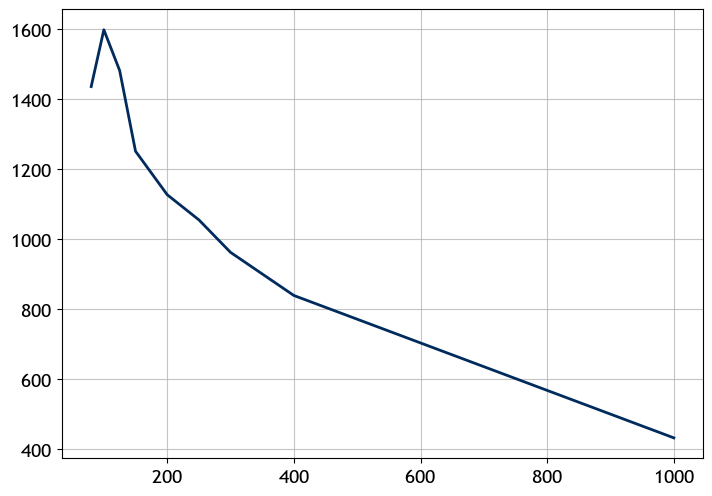

In [153]:
plt.plot(downloaded_res["water_depth"], downloaded_res["m_eq_dominant_direction"])

In [ ]:
response = requests.request(
    method="DELETE", 
    url="http://127.0.0.1:8000/api/analysesresults/analysesmeta",
    data=json.dumps(ret_doc)
)

In [100]:
print((std_check[results.columns]).max().max(),(std_check[results.columns]).min().min() )

1.0 1.0


In [101]:
document['general_results']["m_eq_dominant_direction"]

1251.4406742991164

In [70]:
response = requests.request(
    method="POST", 
    url="http://127.0.0.1:8000/api/analyses",
    data=json.dumps(document)
)
response

<Response [200]>

In [136]:
response = requests.request(
    method="DELETE", 
    url="http://127.0.0.1:8000/api/analyses/f6fa6760-0bae-4ab2-8a5f-fd28134814a5"
)
response

<Response [200]>

In [80]:
res = pd.DataFrame(response.json())


,hs,tp,location,result_type,unit,method,value
0,0.5,2.5,wh_datum,bending moment local y,kNm,std,18.148838
1,0.5,2.5,wh_datum,bending moment local y,kNm,max,56.244430
2,0.5,2.5,wh_datum,bending moment local y,kNm,min,-82.168050
3,0.5,2.5,wh_datum,bending moment local y,kNm,mean,-11.741017
4,0.5,3.5,wh_datum,bending moment local y,kNm,std,18.032655
...,...,...,...,...,...,...,...
3931,10.5,18.5,wh_datum,shear force local y,kN,mean,-0.061909
3932,10.5,19.5,wh_datum,shear force local y,kN,std,9.237488
3933,10.5,19.5,wh_datum,shear force local y,kN,max,40.755780
3934,10.5,19.5,wh_datum,shear force local y,kN,min,-31.571440


In [11]:
response = requests.request(
    method="GET", 
    url="http://127.0.0.1:8000/api/analyses/16e077c5-e126-4687-83d6-0eb5b0bc6779"
)
document_from_db = response.json()
response

<Response [200]>

In [148]:
response = requests.request(
    method="GET", 
    url="http://127.0.0.1:8000/api/analysesresults/seastate_summary_results/16e077c5-e126-4687-83d6-0eb5b0bc6779"
)
response

<Response [500]>

In [74]:
pd.DataFrmae(response.json())

AttributeError: module 'pandas' has no attribute 'DataFrmae'

In [46]:
pd.DataFrame(extract_all_summary_results(document))

,hs,tp,location,result_type,unit,method,value
0,0.5,2.5,wh_datum,bending moment local y,,std,18.148838
1,0.5,2.5,wh_datum,bending moment local y,,max,56.244430
2,0.5,2.5,wh_datum,bending moment local y,,min,-82.168050
3,0.5,2.5,wh_datum,bending moment local y,,mean,-11.741017
4,0.5,3.5,wh_datum,bending moment local y,,std,18.032655
...,...,...,...,...,...,...,...
3931,10.5,18.5,wh_datum,shear force local y,,mean,-0.061909
3932,10.5,19.5,wh_datum,shear force local y,,std,9.237488
3933,10.5,19.5,wh_datum,shear force local y,,max,40.755780
3934,10.5,19.5,wh_datum,shear force local y,,min,-31.571440


In [45]:

# extract_availible_summary_results_methods_one_result_set
extract_summary_result_types(document)

[{'location': 'wh_datum', 'result_type': 'shear force local y'},
 {'location': 'wh_datum', 'result_type': 'bending moment local x'},
 {'location': 'wh_datum', 'result_type': 'shear force local x'},
 {'location': 'wh_datum', 'result_type': 'bending moment local y'},
 {'location': 'lfj_above', 'result_type': 'angle ry'},
 {'location': 'lfj_above', 'result_type': 'angle rx'}]

In [247]:
f"hs=={hs} & tp=={tp} & position=='{position}' & response_type=='{response_type}'"

"hs==0.5 & tp==2.5 & position=='lfj_above' & response_type=='bending moment local x'"

In [256]:
time_series.query(f"hs=={hs} & tp=={tp}")['drio_time_series_id'].values

array(['bf08b678-a9b1-41db-bf19-5bab02316957',
       'e8eeca26-d606-4364-aef0-4eb0f293c1fe',
       'f7d08c6f-76d4-40f8-a53f-174574bfe325',
       '5eefc6b3-3392-4695-8e3d-4103ee08dde2',
       '533e6057-0dda-4425-8951-7fe8f487b203',
       '0b810ce9-0bc0-4495-a5ea-21802c251a29'], dtype=object)

In [232]:
drio_ts.std()

1.4460123358927794

In [229]:
ts_meta

{'drio_time_series_id': '5389cec9-5f0b-47f2-95f1-0fb664e5ab73',
 'hs': 0.5,
 'tp': 2.5,
 'position': 'wh_datum',
 'response_type': 'shear force local x',
 'unit': 'kN',
 'seastate': 'hs0050_tp0250',
 'std': 1.445972170556997,
 'mean': -1.4491610027912563,
 'kurtosis': 0.011671939464776404,
 'skewness': -0.02903963146641122}

In [49]:
document

{'metadata': {'responsible_engineer': 'Harald Holden',
  'project_id': 1685,
  'well_name': 'NORSOK',
  'well_location': {'longitude': None, 'latitude': None},
  'analysis_type': '',
  'version': '10.2b',
  'simulation_lenght': 1800.0,
  'water_depth': 150,
  'wave_direction': 180.0,
  'vessel_heading': 0.0,
  'current': '10pct',
  'vessel_id': 'eaa5c95e-abe3-11ea-a623-e470b8fe3a02',
  'xt': False,
  'soil_profile': 'NORSOK',
  'overpull': 392400.0,
  'drillpipe_tension': 735750.0},
 'general_results': {},
 'all_seastate_results': [{'meta': {'location': 'wh_datum',
    'result_type': 'bending moment local y',
    'unit': ''},
   'data': [{'hs': 0.5,
     'tp': 2.5,
     'result': {'time_series_id': '0bc61367-0d5b-459e-9701-3806fc623d9b',
      'summary_values': [{'method': 'std', 'value': 18.148838237212264},
       {'method': 'max', 'value': 56.24443},
       {'method': 'min', 'value': -82.16805},
       {'method': 'mean', 'value': -11.741017114341142}]}},
    {'hs': 0.5,
     'tp': 3

In [203]:
drio_load_case_id.index[0]

'3eda8b4b-87c2-402d-cb06-08d81831a0a5'

<Response [422]>

In [54]:
import json

In [60]:
response.json()

{'detail': [{'loc': ['body', 'general_results', 'm_eq_dominant_direction'],
   'msg': 'field required',
   'type': 'value_error.missing'},
  {'loc': ['body', 'all_seastate_results', 0, 'meta', 'unit'],
   'msg': "unexpected value; permitted: 'm', 'N', 'kN', 'Nm', 'kNm', 'deg', 'rad', 'm/s'",
   'type': 'value_error.const',
   'ctx': {'given': '',
    'permitted': ['m', 'N', 'kN', 'Nm', 'kNm', 'deg', 'rad', 'm/s']}},
  {'loc': ['body',
    'all_seastate_results',
    0,
    'data',
    0,
    'result',
    'summary_values',
    3,
    'method'],
   'msg': "unexpected value; permitted: 'std', 'max', 'min'",
   'type': 'value_error.const',
   'ctx': {'given': 'mean', 'permitted': ['std', 'max', 'min']}},
  {'loc': ['body',
    'all_seastate_results',
    0,
    'data',
    1,
    'result',
    'summary_values',
    3,
    'method'],
   'msg': "unexpected value; permitted: 'std', 'max', 'min'",
   'type': 'value_error.const',
   'ctx': {'given': 'mean', 'permitted': ['std', 'max', 'min']}}

[{'Id': 'e2fc0c18-d472-4abc-cb09-08d81831a0a5',
  'Namespace': '4subsea.gla_hub.time_series',
  'Key': 'ff3261b4-b936-11ea-82cb-e470b8fe3a02_05d59088-b937-11ea-9f1b-e470b8fe3a02',
  'Value': {'drio_time_series_id': '5389cec9-5f0b-47f2-95f1-0fb664e5ab73',
   'hs': 0.5,
   'tp': 2.5,
   'position': 'wh_datum',
   'response_type': 'shear force local x',
   'unit': 'kN',
   'seastate': 'hs0050_tp0250',
   'std': 1.445972170556997,
   'mean': -1.4491610027912563,
   'kurtosis': 0.011671939464776404,
   'skewness': -0.02903963146641122},
  'TimeSeriesReferenceCount': 0,
  'LastModifiedByEmail': None,
  'LastModified': None,
  'Created': '2020-06-28T12:01:00.7459252+00:00',
  'CreatedByEmail': None},
 {'Id': 'aeb85f9b-83ab-4d06-cb0b-08d81831a0a5',
  'Namespace': '4subsea.gla_hub.time_series',
  'Key': 'ff3261b4-b936-11ea-82cb-e470b8fe3a02_068f6418-b937-11ea-b65f-e470b8fe3a02',
  'Value': {'drio_time_series_id': '0bc61367-0d5b-459e-9701-3806fc623d9b',
   'hs': 0.5,
   'tp': 2.5,
   'position':

In [158]:
vessels = pd.DataFrame([{**c["Value"], 'id': c['Id']} for c in drio_cl.metadata_search("4subsea.gla_hub.vessel", "")])
vessels

,imo_number,name,id
0,8768517,Transocean Spitsbergen,dacbc88e-6511-442c-fac3-08d80afde3bb
1,8772075,Transocean Encourage,013ca451-c847-4c52-fac4-08d80afde3bb
2,8769561,COSL Promoter,99976342-6814-4bf6-179a-08d80afde430
3,8769042,Deepsea Atlantic,cff7a256-378c-43d7-179b-08d80afde430
4,8750833,Deepsea Bergen,b2c75600-435b-4ddb-77a6-08d80b2633a3


,project_number,load_case_number,load_case_description,vessel_key,water_depth,wave_spectra_type,wave_directional_spread,wave_direction,vessel_heading,well_fix_type,well_rot_stiffness,current_profile,uniform_current_velocity,lmrp_overpull,drill_pipe_tension,vessel_offset,lfj_stiffness_at_1deg,XT,m_eq_m5,uploaded_by_email
300,1685,1,,ea566542-abe3-11ea-a93b-e470b8fe3a02,80,jonswap,shortcrested,180.0,0.0,fixed,1.000000e+99,uniform,0.1,156960.0,735750.0,0.0,38000.0,False,607.930201,hho@4subsea.com
23,1685,1,,e98e0cc2-abe3-11ea-a968-e470b8fe3a02,80,jonswap,shortcrested,180.0,0.0,fixed,1.000000e+99,uniform,0.1,1275300.0,735750.0,0.0,178000.0,False,1645.583695,NaN
212,1685,1,,e9cb828a-abe3-11ea-91dc-e470b8fe3a02,80,jonswap,shortcrested,180.0,0.0,fixed,1.000000e+99,uniform,0.1,657270.0,735750.0,0.0,88300.0,False,1030.289514,hho@4subsea.com
92,1685,1,,eaa5c95e-abe3-11ea-a623-e470b8fe3a02,80,jonswap,shortcrested,180.0,0.0,fixed,1.000000e+99,uniform,0.1,392400.0,735750.0,0.0,125000.0,False,1440.540857,hho@4subsea.com
348,1685,1,,ea19981c-abe3-11ea-a3c0-e470b8fe3a02,80,jonswap,shortcrested,180.0,0.0,fixed,1.000000e+99,uniform,0.1,392400.0,735750.0,0.0,61200.0,False,1536.044293,hho@4subsea.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,1685,127,,e98e0cc2-abe3-11ea-a968-e470b8fe3a02,400,jonswap,shortcrested,67.5,0.0,fixed,1.000000e+99,uniform,0.1,882900.0,735750.0,0.0,178000.0,False,NaN,hho@4subsea.com
447,1685,128,,e98e0cc2-abe3-11ea-a968-e470b8fe3a02,400,jonswap,shortcrested,90.0,0.0,fixed,1.000000e+99,uniform,0.1,882900.0,735750.0,0.0,178000.0,False,NaN,hho@4subsea.com
448,1685,129,,e98e0cc2-abe3-11ea-a968-e470b8fe3a02,400,jonswap,shortcrested,112.5,0.0,fixed,1.000000e+99,uniform,0.1,882900.0,735750.0,0.0,178000.0,False,NaN,hho@4subsea.com
449,1685,130,,e98e0cc2-abe3-11ea-a968-e470b8fe3a02,400,jonswap,shortcrested,135.0,0.0,fixed,1.000000e+99,uniform,0.1,882900.0,735750.0,0.0,178000.0,False,NaN,hho@4subsea.com


In [150]:
drio_cl.metadata_search("4subsea.gla_hub.load_case", "")

[{'Id': '8c1d5c6e-26f8-48a6-fd5a-08d80afde3bb',
  'Namespace': '4subsea.gla_hub.load_case',
  'Key': '1d7a7874-abeb-11ea-a567-e470b8fe3a02',
  'Value': {'project_number': 1685,
   'load_case_number': 3,
   'load_case_description': '',
   'vessel_key': 'e98e0cc2-abe3-11ea-a968-e470b8fe3a02',
   'water_depth': 125,
   'wave_spectra_type': 'jonswap',
   'wave_directional_spread': 'shortcrested',
   'wave_direction': 180,
   'vessel_heading': 0.0,
   'well_fix_type': 'fixed',
   'well_rot_stiffness': 1e+99,
   'current_profile': 'uniform',
   'uniform_current_velocity': 0.1,
   'lmrp_overpull': 1275300.0,
   'drill_pipe_tension': 735750.0,
   'vessel_offset': 0.0,
   'lfj_stiffness_at_1deg': 178000.0,
   'XT': False,
   'm_eq_m5': 1160.7414743626864},
  'TimeSeriesReferenceCount': 0,
  'LastModifiedByEmail': None,
  'LastModified': '2021-08-12T21:36:44.4123+00:00',
  'Created': '2020-06-11T13:54:48.9544493+00:00',
  'CreatedByEmail': None},
 {'Id': '16f34f2e-011c-4433-067a-08d80afde3bc',
 

In [ ]:
uploaded_time_series_data = pd.read_csv()

In [108]:
results.columns

Index(['l_lowerstack x bend moment at ptEndA',
       'l_lowerstack y bend moment at ptEndA',
       'l_lowerstack x shear force at ptEndA',
       'l_lowerstack y shear force at ptEndA',
       'l_lowerstack Dynamic Rx at ptEndA',
       'l_lowerstack Dynamic Ry at ptEndA',
       'l_lowerstack Effective tension at ptEndA',
       'l_lowerstack Dynamic Rx at ptEndB',
       'l_lowerstack Dynamic Ry at ptEndB', 'l_mr1 Dynamic Rx at ptEndA',
       'l_mr1 Dynamic Ry at ptEndA', 'l_mr3 Dynamic Rx at ptEndB',
       'l_mr3 Dynamic Ry at ptEndB', 'l_mr4 X at ptEndB', 'l_mr4 Y at ptEndB',
       'l_mr4 Z at ptEndB', 'l_mr4 Dynamic Rx at ptEndB',
       'l_mr4 Dynamic Ry at ptEndB',
       'v_Transocean Spitsbergen GZ velocity at Position [0,0,0]',
       'v_Transocean Spitsbergen Heave at Position [0,0,0]',
       'v_Transocean Spitsbergen Pitch at Position [0,0,0]',
       'v_Transocean Spitsbergen Roll at Position [0,0,0]',
       'v_Transocean Spitsbergen Surge at Position [0,0,0]',
    

In [39]:
BASEPATH = r"E:\1155_wellheadloads\CatD\temp1\case01"
glob.glob(os.path.join(BASEPATH, "*.4ss"))

['E:\\1155_wellheadloads\\CatD\\temp1\\case01\\Case01_Cat-D_P1X_wd80m_H0050_T0250_Dir18000_TS1_whmom_whshear_lfjrot_ts.4ss',
 'E:\\1155_wellheadloads\\CatD\\temp1\\case01\\Case01_Cat-D_P1X_wd80m_H0050_T0350_Dir18000_TS1_whmom_whshear_lfjrot_ts.4ss',
 'E:\\1155_wellheadloads\\CatD\\temp1\\case01\\Case01_Cat-D_P1X_wd80m_H0050_T0450_Dir18000_TS1_whmom_whshear_lfjrot_ts.4ss',
 'E:\\1155_wellheadloads\\CatD\\temp1\\case01\\Case01_Cat-D_P1X_wd80m_H0050_T0550_Dir18000_TS1_whmom_whshear_lfjrot_ts.4ss',
 'E:\\1155_wellheadloads\\CatD\\temp1\\case01\\Case01_Cat-D_P1X_wd80m_H0050_T0650_Dir18000_TS1_whmom_whshear_lfjrot_ts.4ss',
 'E:\\1155_wellheadloads\\CatD\\temp1\\case01\\Case01_Cat-D_P1X_wd80m_H0050_T0750_Dir18000_TS1_whmom_whshear_lfjrot_ts.4ss',
 'E:\\1155_wellheadloads\\CatD\\temp1\\case01\\Case01_Cat-D_P1X_wd80m_H0050_T0850_Dir18000_TS1_whmom_whshear_lfjrot_ts.4ss',
 'E:\\1155_wellheadloads\\CatD\\temp1\\case01\\Case01_Cat-D_P1X_wd80m_H0050_T0950_Dir18000_TS1_whmom_whshear_lfjrot_ts.4ss',


In [43]:
glob.glob("E:\1155_wellheadloads\CatD\temp1\*")

[]

['Case01']

'E:\\1155_wellheadloads\\P1685\\TOS\\out'

In [86]:
file_locations['CatD'][1]

'E:\\1155_wellheadloads\\CatD\\temp1\\case01'

{128: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 129: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 130: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 131: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 76: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 77: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 78: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 79: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 80: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 81: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 82: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 83: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 84: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 85: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 86: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 87: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 88: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 89: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 90: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 91: 'E:\\1155_wellheadloads\\P1685\\TOS\\out',
 92: 'E:\\1155_wellheadloads\\P1685\

In [75]:
glob.glob(os.path.join(r"E:\1155_wellheadloads\P1685\TOS\out", '*.4ss'))

['E:\\1155_wellheadloads\\P1685\\TOS\\out\\Case100_Transocean Spitsbergen_P1X_wd100m_H0050_T0250_Dir18000_temp_all_results.4ss',
 'E:\\1155_wellheadloads\\P1685\\TOS\\out\\Case100_Transocean Spitsbergen_P1X_wd100m_H0050_T0350_Dir18000_temp_all_results.4ss',
 'E:\\1155_wellheadloads\\P1685\\TOS\\out\\Case100_Transocean Spitsbergen_P1X_wd100m_H0050_T0450_Dir18000_temp_all_results.4ss',
 'E:\\1155_wellheadloads\\P1685\\TOS\\out\\Case100_Transocean Spitsbergen_P1X_wd100m_H0050_T0550_Dir18000_temp_all_results.4ss',
 'E:\\1155_wellheadloads\\P1685\\TOS\\out\\Case100_Transocean Spitsbergen_P1X_wd100m_H0050_T0650_Dir18000_temp_all_results.4ss',
 'E:\\1155_wellheadloads\\P1685\\TOS\\out\\Case100_Transocean Spitsbergen_P1X_wd100m_H0050_T0750_Dir18000_temp_all_results.4ss',
 'E:\\1155_wellheadloads\\P1685\\TOS\\out\\Case100_Transocean Spitsbergen_P1X_wd100m_H0050_T0850_Dir18000_temp_all_results.4ss',
 'E:\\1155_wellheadloads\\P1685\\TOS\\out\\Case100_Transocean Spitsbergen_P1X_wd100m_H0050_T0950_

In [74]:
os.path.join("E:\1155_wellheadloads\P1685\TOS\out", '*.4ss')

'E:M5_wellheadloads\\P1685\\TOS\\out\\*.4ss'